<div style="width: 50%; float: left">
    <strong><center>UNIVERSIDAD POLITECNICA SALESIANA</center></strong>
    <br><center>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>NRO. PRUEBA: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Bryam Barrera
    <br>
</div>
<div style="width: 50%; float: left">
  
</div>
<br>
<br>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>




*   **Importamos las librerias necesarias**



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import statistics       
from google.colab import files
import plotly.graph_objects as go
import altair as alt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns



### Generar gráficas para entender y procesar los datos:


*   **Graficas y reportes del total de personas empleadas y desempleadas por año.**




In [2]:
poblaciones = pd.read_csv("/content/1.Poblaciones.csv",skiprows=2, low_memory=False,encoding= 'latin1')
#imprimir los primeros 5 datos del archivo

print(poblaciones)

    Encuesta     Periodo  ...   Hombre    Mujer
0     ENEMDU  12/01/2007  ...  6768646  6913656
1     ENEMDU  12/01/2007  ...  2226618  2146194
2     ENEMDU  12/01/2007  ...  4542028  4767462
3     ENEMDU  12/01/2007  ...  3777232  2558798
4     ENEMDU  12/01/2007  ...  3632314  2387018
..       ...         ...  ...      ...      ...
895  ENEMDU*  10/01/2021  ...   150276   185824
896  ENEMDU*  10/01/2021  ...    25975    22128
897  ENEMDU*  10/01/2021  ...   140223   158623
898  ENEMDU*  10/01/2021  ...    36028    49330
899  ENEMDU*  10/01/2021  ...  1324745  3005495

[900 rows x 8 columns]


*   **Filtración de datos:** Filtramos el total de la población empleo y desempleo que existe en el conjunto de datos.





In [3]:
empleo=poblaciones.loc[ (poblaciones['Unnamed: 2']) == 'Empleo']
desempleo=poblaciones.loc[ (poblaciones['Unnamed: 2']) == 'Desempleo']

*   **Para manejar de mejor manera el dataframe extraemos el año y lo adicionamos en una nueva columna**






In [4]:
def sacAnio(anio):
  return str(anio).split("/")[2]

empleo["Anios"]=empleo.apply(lambda x: sacAnio(x[1]), axis=1)
desempleo["Anios"]=desempleo.apply(lambda x: sacAnio(x[1]), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
empleo.head()

,Encuesta,Periodo,Unnamed: 2,Total,Urbana,Rural,Hombre,Mujer,Anios
4,ENEMDU,12/01/2007,Empleo,6019332,3971040,2048292,3632314,2387018,2007
22,ENEMDU,06/01/2008,Empleo,6245225,4151002,2094223,3742213,2503012,2008
40,ENEMDU,12/01/2008,Empleo,6005395,4012298,1993097,3635236,2370159,2008
58,ENEMDU,12/01/2009,Empleo,6125135,4050179,2074956,3699840,2425296,2009
76,ENEMDU,06/01/2010,Empleo,6174141,4075417,2098724,3716323,2457818,2010


In [6]:
desempleo.head()

,Encuesta,Periodo,Unnamed: 2,Total,Urbana,Rural,Hombre,Mujer,Anios
12,ENEMDU,12/01/2007,Desempleo,316697,256662,60036,144918,171780,2007
30,ENEMDU,06/01/2008,Desempleo,344143,282489,61654,151283,192860,2008
48,ENEMDU,12/01/2008,Desempleo,380026,317011,63015,165296,214730,2008
66,ENEMDU,12/01/2009,Desempleo,423802,347068,76734,201625,222177,2009
84,ENEMDU,06/01/2010,Desempleo,408318,338652,69666,194691,213628,2010



*   **Aqui podemos observar como se guardaron los años en la columna creada**



In [7]:
anios_empleo=empleo.iloc[:,-1]
anios_empleo=anios_empleo.unique()
print(anios_empleo)

['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020' '2021']


*      **Creamos una función que permite realizar una búsqueda en los registros del dataset**

In [8]:
#Funcion de Busqueda
def search_value_desemp(param,key,val):
  if param==key:
    return val   

#Creacion de diccionarios y busqueda de datos
list_vals_emp_anio=[]
list_vals_desemp_anio=[]
dic_empleo={}
dic_desempleo={}

#Procedemos ha realizar la búsqueda en función de todos los años, 
#tanto en el dataframe de empleo y del de desempleo de paso procedemos 
#a realizar un promedio en base a los datos porque existen cifras 
#por cada mes reduciendo la información a intervalos por año
for i in anios_empleo:
  df_Emp=empleo.apply(lambda x:search_value_desemp(i,x[8],x[3]),axis=1)
  df_Emp=df_Emp.dropna()
  dic_empleo.setdefault(i,df_Emp.mean())

for i in anios_empleo:
  df_Emp=desempleo.apply(lambda x:search_value_desemp(i,x[8],x[3]),axis=1)
  df_Emp=df_Emp.dropna()
  dic_desempleo.setdefault(i,df_Emp.mean())

print('**EMPLEO**:','[',dic_empleo,']')  
print('**DESEMPELO**:','[',dic_desempleo,']')   

**EMPLEO**: [ {'2007': 6019332.0, '2008': 6125310.0, '2009': 6125135.0, '2010': 6143685.5, '2011': 6264709.0, '2012': 6506555.5, '2013': 6695018.0, '2014': 6784413.75, '2015': 7151139.25, '2016': 7482333.75, '2017': 7766294.0, '2018': 7778951.0, '2019': 7853174.75, '2020': 7673343.25, '2021': 7917790.1} ]
**DESEMPELO**: [ {'2007': 316697.0, '2008': 362084.5, '2009': 423802.0, '2010': 365672.5, '2011': 302996.0, '2012': 279372.5, '2013': 281348.0, '2014': 304555.0, '2015': 324618.0, '2016': 423871.75, '2017': 358466.5, '2018': 330265.75, '2019': 365105.75, '2020': 456457.5, '2021': 431402.7} ]



* **Creamos un dataset el cual contenga todos los años y sus valores**


In [9]:
empleo=pd.DataFrame(dic_empleo.items())
empleo.columns=['Años','Empleo']

desempleo=pd.DataFrame(dic_desempleo.items())
desempleo.columns=['Años','Desempleo']

empleo["Desempleo"]=desempleo.iloc[:,-1]
empleo.head()

,Años,Empleo,Desempleo
0,2007,6019332.0,316697.0
1,2008,6125310.0,362084.5
2,2009,6125135.0,423802.0
3,2010,6143685.5,365672.5
4,2011,6264709.0,302996.0


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Grafico de comparacion de Empelos y Desempleos**



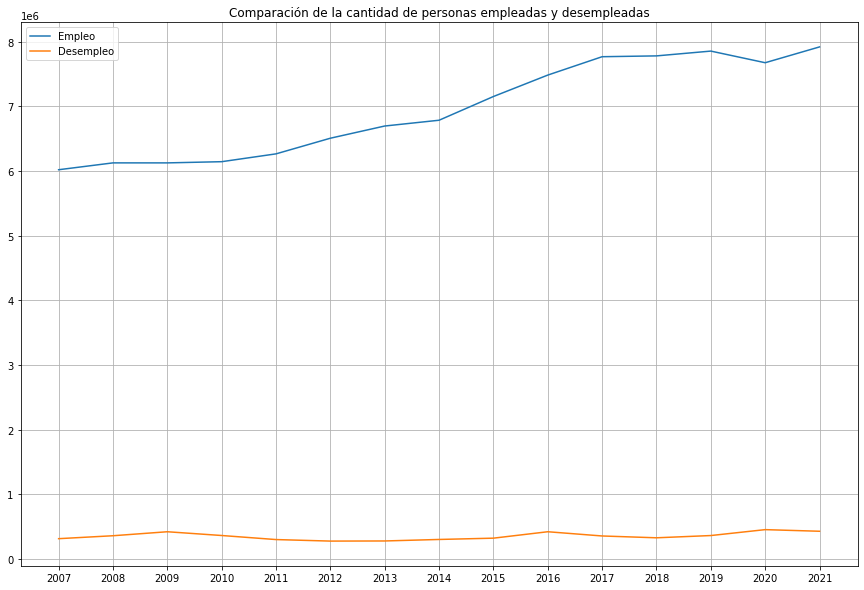

In [11]:
plt.figure(figsize=(15,10))
plt.grid(True)

plt.plot(empleo['Años'], empleo['Empleo'], label='Empleo')
plt.plot(desempleo['Años'], desempleo['Desempleo'], label='Desempleo')

plt.title('Comparación de la cantidad de personas empleadas y desempleadas')
try:
    plt.ticklabel_format(style='plain')
except AttributeError:
    print('')
plt.legend(loc='upper left')
plt.show()

* **Gráfico de pie por personas basadas en la secrización de empleo**

In [12]:
sec= pd.read_csv("drive/MyDrive/Prueba/Sectoriza.csv",skiprows=0, low_memory=False,encoding= 'latin1')
sec=sec.iloc[0:5]
sec=sec.transpose()
sec.columns=sec.iloc[1]
sec=sec.iloc[2:]
sec.head()
sec.to_csv('drive/MyDrive/Prueba/datos.csv',encoding= 'latin1')

In [13]:
sec= pd.read_csv("drive/MyDrive/Prueba/datos.csv",skiprows=0, low_memory=False,encoding= 'latin1')
sec.head(20)

,Unnamed: 0,Unnamed: 1,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector
0,Unnamed: 2,06/01/2007,-,-,-,-
1,Unnamed: 3,09/01/2007,-,-,-,-
2,Unnamed: 4,12/01/2007,41%,45.1%,3.3%,10.6%
3,Unnamed: 5,03/01/2008,-,-,-,-
4,Unnamed: 6,06/01/2008,42.5%,45.4%,3.3%,8.8%
5,Unnamed: 7,09/01/2008,-,-,-,-
6,Unnamed: 8,12/01/2008,43.9%,43.5%,3.5%,9.2%
7,Unnamed: 9,03/01/2009,-,-,-,-
8,Unnamed: 10,06/01/2009,-,-,-,-
9,Unnamed: 11,09/01/2009,-,-,-,-


*   **Para manejar de mejor manera el dataframe extraemos el año y lo adicionamos en una nueva columna**




In [14]:
sec["Anios"]=sec.apply(lambda x: sacAnio(x[1]), axis=1)
sec.head()

,Unnamed: 0,Unnamed: 1,Sector Formal,Sector Informal,Empleo Doméstico,No Clasificados por Sector,Anios
0,Unnamed: 2,06/01/2007,-,-,-,-,2007
1,Unnamed: 3,09/01/2007,-,-,-,-,2007
2,Unnamed: 4,12/01/2007,41%,45.1%,3.3%,10.6%,2007
3,Unnamed: 5,03/01/2008,-,-,-,-,2008
4,Unnamed: 6,06/01/2008,42.5%,45.4%,3.3%,8.8%,2008


*      **Creamos una función que permite realizar una búsqueda en los registros del dataset**

In [15]:
def search_value_sec(param,key,secF,secIn,empD,noClass):
  if param==key:
    return float(secF.strip('%')),float(secIn.strip('%')),float(empD.strip('%')),float(noClass.strip('%')),key  




In [26]:
def sectorizacion(rang1,rang2):
  dfF=pd.DataFrame()
  for i in range(rang1,rang2):
    dfT=sec.apply(lambda x: search_value_sec(str(i),x[6],x[2],x[3],x[4],x[5]),axis=1)
    dfT=dfT.dropna()
    dfT=dfT.to_frame()
    dfT.columns=['one']
    dfT=pd.DataFrame(dfT['one'].values.tolist())
    dfT.columns=['Sector Formal'	,'Sector Informal'	,'Empleo Doméstico',	'No Clasificados por Sector',	'Anios']
    dfTMean=dfT.describe().iloc[1:2]
    dfTMean['Anios']=i
    dfF=pd.concat([dfF,dfTMean],axis=0)
  
  dfF=dfF.transpose()  
  dfF.columns=dfF.iloc[-1]
  dfF=dfF.iloc[:-1]
  dfF.to_csv('drive/MyDrive/Prueba/PIE.csv',encoding= 'latin1')

  return dfF


In [27]:
dfF= pd.read_csv("drive/MyDrive/Prueba/PIE.csv",skiprows=0, low_memory=False,encoding= 'latin1')
dfF.set_index('Unnamed: 0',inplace = True)

In [56]:
#funcion para graficar
def graficar(dataF,rang1,rang2):
  for i in range(rang1,rang2):
    my_cols=['lightgreen','lightblue','silver','red']
    dfF.plot.pie(subplots=True,y=str(i)+".0", figsize=(9, 4),startangle=45, fontsize=16, explode=(0.03,0.03,0.03,0.03),colors=my_cols, autopct='%1.1f%%',frame=True)
 
    


**Grafico PIE**

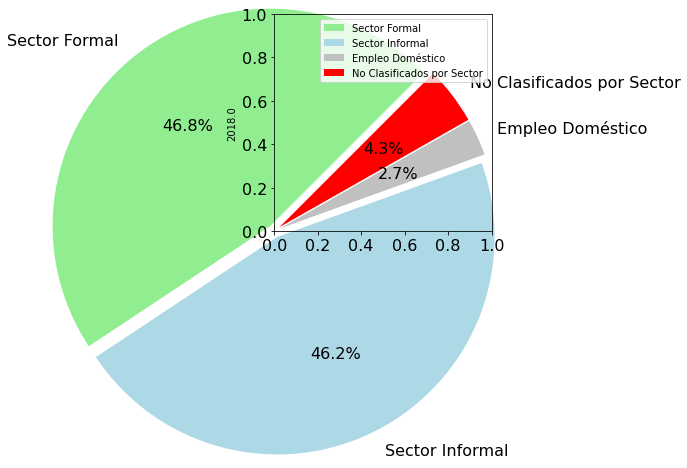

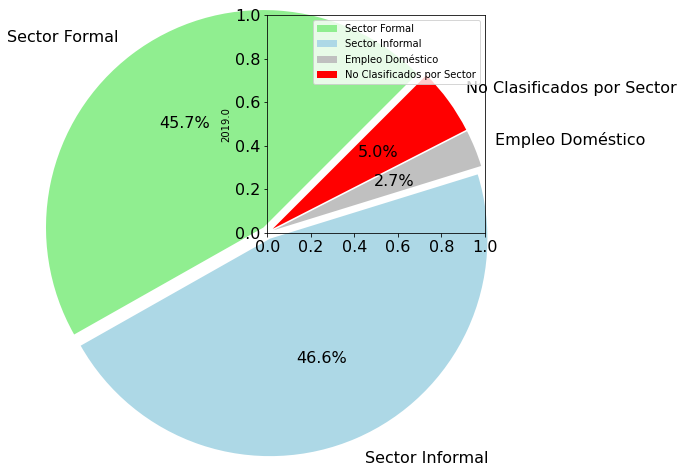

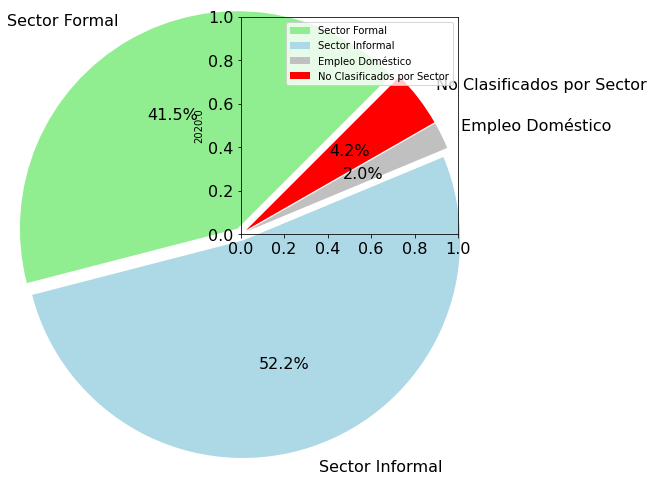

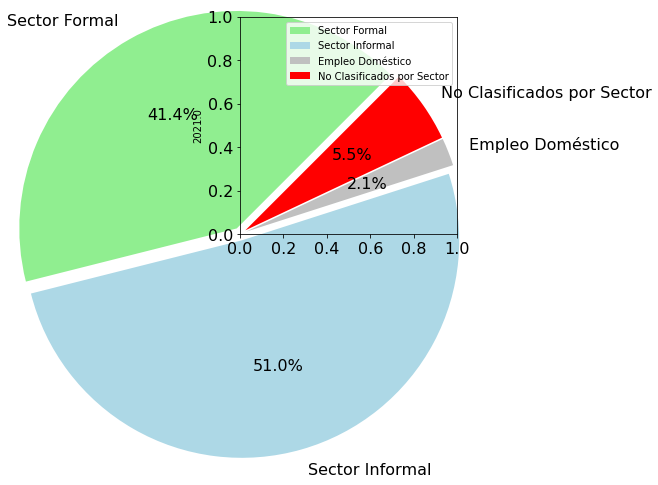

In [57]:
dataSecto=sectorizacion(2018,2022)
graficar(dataSecto,2018,2022)

##Generar histogramas subempleo, empleo pleno y empleo no pleno por año
Procedemos a extraer la información necesaria para resolver el enunciado, dicha información está disponible en el dataset de población 

In [30]:
subempleo=poblaciones.loc[ (poblaciones['Unnamed: 2']) == 'Subempleo']
pleno=poblaciones.loc[ (poblaciones['Unnamed: 2']) == 'Empleo Adecuado/Pleno']
no_pleno=poblaciones.loc[ (poblaciones['Unnamed: 2']) == 'Otro Empleo no pleno']

In [31]:
subempleo["Anios"]=subempleo.apply(lambda x: sacAnio(x[1]), axis=1)
pleno["Anios"]=pleno.apply(lambda x: sacAnio(x[1]), axis=1)
no_pleno["Anios"]=no_pleno.apply(lambda x: sacAnio(x[1]), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

* **Procedemos a concatenar toda la información en un solo dataframe**

In [33]:
data_Final=pd.concat([subempleo,pleno,no_pleno],axis=0)
data_Final=data_Final.iloc[:,[2,3,8]]
data_Final.columns=['Tipo','Total','Anios']
data_Final.head()

,Tipo,Total,Anios
6,Subempleo,1155872,2007
24,Subempleo,1130699,2008
42,Subempleo,957978,2008
60,Subempleo,1071615,2009
78,Subempleo,1041266,2010



* **Función de todos los años y un palabra clave que  en este caso sería Subempleo, empleo pleno y no pleno**


In [50]:
def search_value(param_anio,param_tipo,key_anio,key_tipo,total):
  if param_anio==key_anio and param_tipo== key_tipo:
    return param_tipo,total,param_anio
#Esta función general nos permite obtener el data frame que buscamos en función del rango de años y una palabra clave, nos debe retornar la información requerida
def estadoDeEmpleo(rang1,rang2,tipo):
    dfF=pd.DataFrame(columns=['Tipo','Total','Anios'])
    for i in range(rang1,rang2):
        df_Emp=data_Final.apply(lambda x: search_value(str(i),tipo,x[2],x[0],x[1]),axis=1)
        df_Emp=df_Emp.dropna()
        df_Emp=df_Emp.to_frame()
        df_Emp.columns=['one']
        df_Emp=pd.DataFrame(df_Emp['one'].values.tolist())
        df_Emp.columns=['Tipo','Total','Anios']
        dfF=pd.concat([dfF,df_Emp],axis=0)


    dfF[['Total']]=dfF[['Total']].astype(int)

    return dfF.groupby(['Anios'])['Total'].agg([np.average]) 

In [51]:
def graficarHisto(data):
  my_cols=['lightgreen','lightblue','red']
  data.plot(kind="barh", figsize=(16,10), title="Histograma", layout=tuple, color=my_cols)

,subempleo,pleno,no_pleno
Anios,,,
2014,890444.50,3391765.25,1983901.75
2015,1034029.25,3404390.25,2032688.75
2016,1437778.75,3188784.00,2070205.75
2017,1669343.50,3275341.00,1986290.00
2018,1493030.00,3249694.50,2162808.00


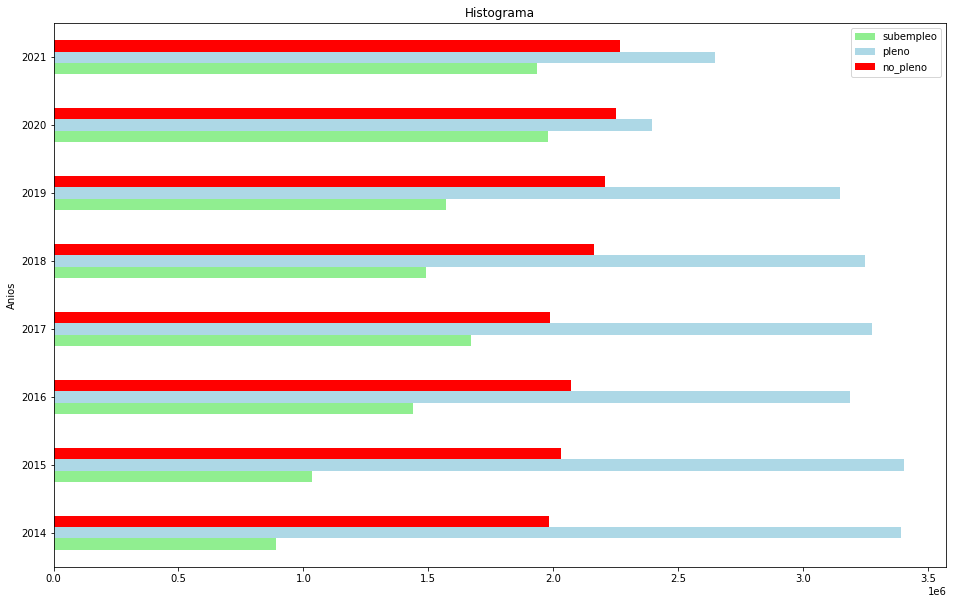

In [52]:
df_sub=estadoDeEmpleo(2014,2022,"Subempleo")
df_pleno=estadoDeEmpleo(2014,2022,"Empleo Adecuado/Pleno")
df_no_pleno=estadoDeEmpleo(2014,2022,"Otro Empleo no pleno")

df_histograma=df_sub
df_histograma['pleno']=df_pleno.iloc[:,-1]
df_histograma['no_pleno']=df_no_pleno.iloc[:,-1]
df_histograma.rename(columns={'average':'subempleo'},inplace=True)
graficarHisto(df_histograma)
df_histograma.head()

### Conclusiones

Los modelos con regresiones polinómicas realizan mejores predicciones ya que se ajustan de mejor manera a los datos reales. Sin embargo, al aumentar el grado de la regresión polinómica podemos caer en un overfitting que nos arrojará resultados erróneos

### Recomendaciones

Se recomienda realizar un estudio futuro para analizar el impacto de los empleos de las personas empleadas y desempeladas totalmente